In [340]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [341]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [342]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [343]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [344]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
columns_to_scale = list(df_market_data.columns)

market_scaled = StandardScaler().fit_transform(df_market_data[columns_to_scale])


In [345]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(market_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original DataFrame
df_market_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_scaled = df_market_scaled.set_index('coin_id')

# Display the scaled DataFrame
df_market_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [346]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [347]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_scaled)
    inertia.append(k_model.inertia_)


In [348]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


In [349]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plot_elbow_scaled = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Scaled Elbow Curve", 
    xticks=k
)
plot_elbow_scaled

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [350]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [351]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_scaled)

KMeans(n_clusters=4, random_state=1)

In [352]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
crypto_clusters = model.predict(df_market_scaled)

# Print the resulting array of cluster values.
print(crypto_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [353]:
# Create a copy of the scaled DataFrame
df_predict = df_market_scaled.copy()

In [354]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_predict["CryptoCluster"] = crypto_clusters

# Display the copy of the scaled DataFrame
df_predict.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CryptoCluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [355]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

plot_scale_data = df_predict.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="CryptoCluster",
    hover_cols = "coin_id", 
    title = "Scale Market Data",
    label= 'Scaled'
)
plot_scale_data

:NdOverlay   [CryptoCluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [356]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3, random_state=1)

In [357]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
crypto_pca = pca.fit_transform(df_market_scaled)

# View the scaled PCA data
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [358]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [359]:
# Create a new DataFrame with the PCA data.
df_crypto_pca = pd.DataFrame(crypto_pca, columns= ['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original scaled DataFrame
df_crypto_pca["coin_id"] = df_market_data.index

# Set the coin_id column as index
df_crypto_pca.set_index("coin_id", inplace= True)

# Display the scaled PCA DataFrame
df_crypto_pca.head()


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [360]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [361]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_crypto_pca)
    inertia.append(k_model.inertia_)

In [362]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_pca

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


In [363]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pca_elbow_curve = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title=" PCA Elbow Curve", 
    xticks=k
)
pca_elbow_curve

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [364]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=4, random_state=1)

In [365]:
# Fit the K-Means model using the PCA data
model_pca.fit(df_crypto_pca)

KMeans(n_clusters=4, random_state=1)

In [366]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predict_pca = model_pca.predict(df_crypto_pca)

# Print the resulting array of cluster values.
print(predict_pca)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [367]:
# Create a copy of the scaled PCA DataFrame
df_predict_pca = df_crypto_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_predict_pca["CryptoPCA"] = predict_pca

# Display the copy of the scaled PCA DataFrame
df_predict_pca.head()

,PCA1,PCA2,PCA3,CryptoPCA
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [371]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

plot_pca_data = df_predict_pca.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="CryptoPCA",
    hover_cols = "coin_id", 
    title = "PCA Kmeans",
    label= 'PCA'
)
plot_pca_data

:NdOverlay   [CryptoPCA]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

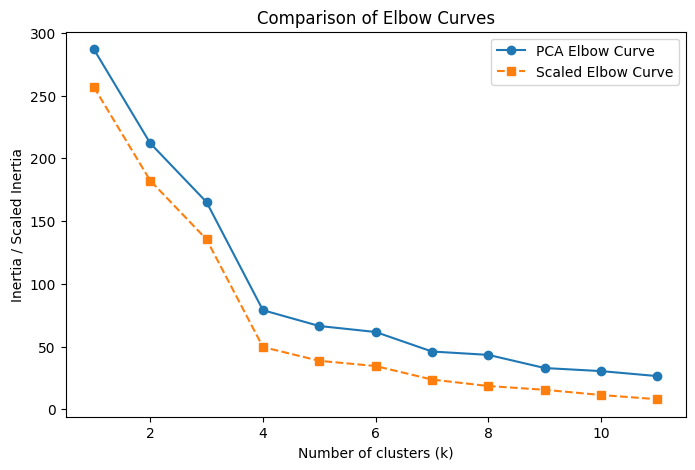

In [369]:
# Composite plot to contrast the Elbow curves

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# First Elbow curve
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', linestyle='-', label='PCA Elbow Curve')

# Second Elbow curve (Scaled)
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], marker='s', linestyle='--', label='Scaled Elbow Curve')

# Labels, title, and legend
plt.title('Comparison of Elbow Curves')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia / Scaled Inertia')
plt.legend()

# Display the plot
plt.show()


In [373]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
import hvplot.pandas  # Ensure hvplot is imported

# Display the plots side by side
side_by_side_plot = plot_pca_data + plot_scale_data

# Show the side-by-side plots
side_by_side_plot


:Layout
   .NdOverlay.PCA    :NdOverlay   [CryptoPCA]
      :Scatter   [PCA1]   (PCA2,coin_id)
   .NdOverlay.Scaled :NdOverlay   [CryptoCluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

scale_market_data

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features with PCA creates clearer and more compact clusters by focusing on the most important information, though some details may be lost. On the other hand, clustering with all scaled features captures more variation but can result in more scattered and harder-to-interpret clusters. PCA helps simplify the data and highlight key patterns, while the original features provide more detail but with a higher chance of noise.